In [5]:
# Supervised Learning Comparison: Tree-Based Models & KNN
# Dataset: Telco Customer Churn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



In [6]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())



Dataset Shape: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customer ID
df.drop(columns=["customerID"], inplace=True)

# Fix TotalCharges column
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

print("\nDataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (7032, 20)


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns

print("\nNumerical Features:", list(numerical_cols))
print("Categorical Features:", list(categorical_cols))


Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5274
Testing samples: 1758


In [ ]:
# evaluation function
def evaluate_and_visualize(model, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    return acc, prec, rec, f1

results = {}


--- Decision Tree Performance ---
Accuracy : 0.724
Precision: 0.481
Recall   : 0.482
F1-score : 0.481


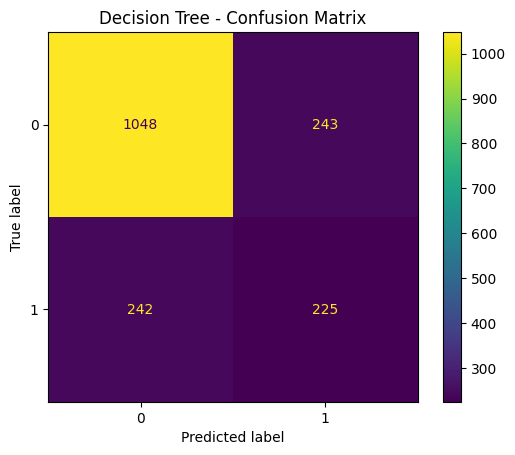


--- Random Forest Performance ---
Accuracy : 0.782
Precision: 0.615
Recall   : 0.482
F1-score : 0.540


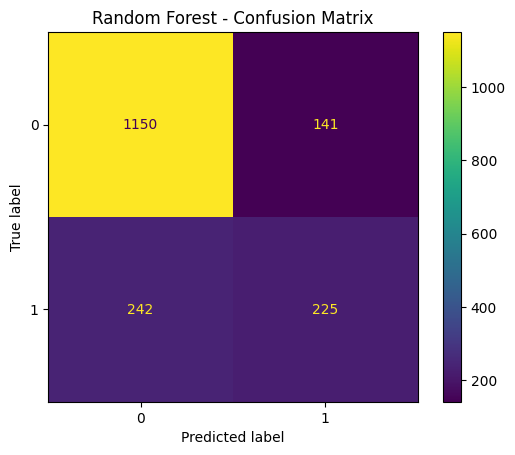


--- Gradient Boosting Performance ---
Accuracy : 0.794
Precision: 0.641
Recall   : 0.512
F1-score : 0.569


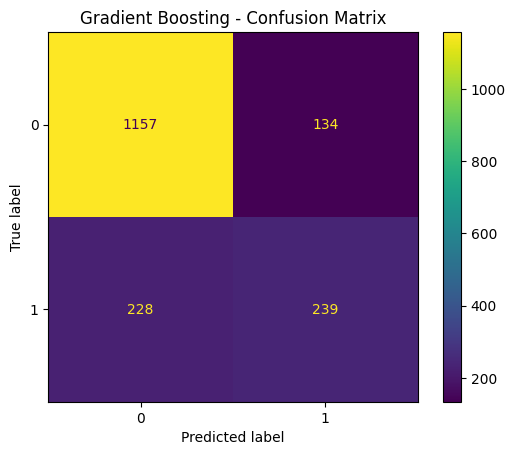

In [11]:
# Tree-Based Models
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in tree_models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", clf)
    ])
    pipeline.fit(X_train, y_train)
    results[name] = evaluate_and_visualize(pipeline, name)


In [ ]:
# K-Nearest Neighbors (KNN)
k_values = range(1, 21)
knn_accuracies = []

print("\nTraining KNN with different k values...")

for k in k_values:
    knn_pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.3f}")


Training KNN with different k values...
k = 1, Accuracy = 0.726
k = 2, Accuracy = 0.758
k = 3, Accuracy = 0.755
k = 4, Accuracy = 0.771
k = 5, Accuracy = 0.765
k = 6, Accuracy = 0.782
k = 7, Accuracy = 0.766
k = 8, Accuracy = 0.788
k = 9, Accuracy = 0.779
k = 10, Accuracy = 0.786
k = 11, Accuracy = 0.774
k = 12, Accuracy = 0.786
k = 13, Accuracy = 0.777
k = 14, Accuracy = 0.782
k = 15, Accuracy = 0.780
k = 16, Accuracy = 0.790
k = 17, Accuracy = 0.780
k = 18, Accuracy = 0.790
k = 19, Accuracy = 0.787
k = 20, Accuracy = 0.794


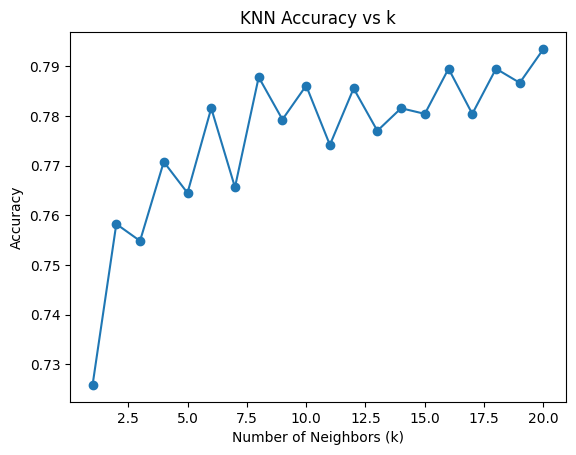

In [13]:
# Visualization: Accuracy vs k
plt.figure()
plt.plot(k_values, knn_accuracies, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()



Optimal k value: 20

--- KNN (k=20) Performance ---
Accuracy : 0.794
Precision: 0.623
Recall   : 0.563
F1-score : 0.592


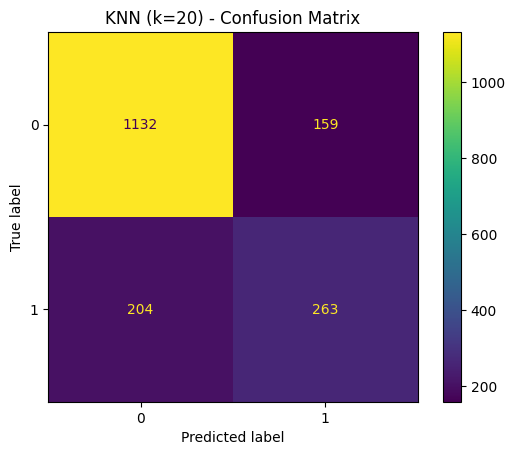

In [14]:
# Best k
best_k = k_values[np.argmax(knn_accuracies)]
print(f"\nOptimal k value: {best_k}")

# Final KNN model
knn_final = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=best_k))
])
knn_final.fit(X_train, y_train)
results[f"KNN (k={best_k})"] = evaluate_and_visualize(knn_final, f"KNN (k={best_k})")


In [15]:
# Final Results Table
results_df = pd.DataFrame(
    results,
    index=["Accuracy", "Precision", "Recall", "F1-score"]
).T

print("\n========== Final Model Comparison ==========")
print(results_df)



========== Final Model Comparison ==========
                   Accuracy  Precision    Recall  F1-score
Decision Tree      0.724118   0.480769  0.481799  0.481283
Random Forest      0.782139   0.614754  0.481799  0.540216
Gradient Boosting  0.794084   0.640751  0.511777  0.569048
KNN (k=20)         0.793515   0.623223  0.563169  0.591676


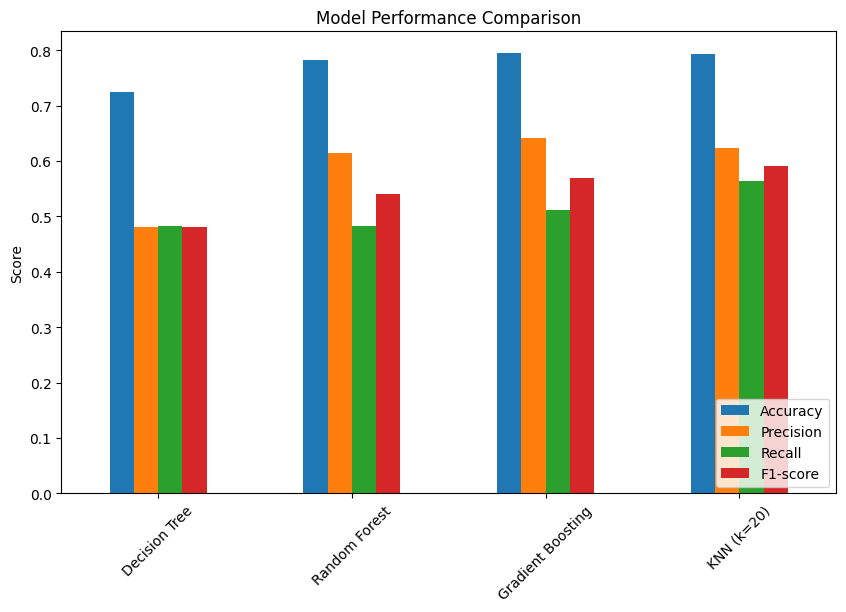

In [16]:

# Visualization: Model comparison
results_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()
